## pyplot模块快速绘图

matplotlib的pyplot模块提供了与MATLIB类似的绘图闲数调用接口，方便用户快速绘制二维图表。
    
**plt.figure()**:创建一个Figure对象，并将其作为当前的Figure对象。如果不创建Figure对象而直接使用plot()进行绘图，则会自动创建一个Figure对象。figsize参数为Figure对象的宽度和高度，单位为英寸。dpi参数指定Figure对象的分辨率，即每英寸的像素数，默认值为80。
    
**axes**：Axes子图对象，所有plot()都是在Axes（子图）对象上绘图，如果当前的Figure对象没有Axes对象，则会自动创建一个几乎充满图表的一个Axes对象，并且将其设为当前子图对象。
    
**plot()**:用于绘制图形，前两个参数表示数据的X,Y轴数据，可以使用numpy数组对象。
    
    label参数表示曲线图例，会在图表上显示。如果字符串前后使用，则会将其显示为数学公式。
    linewidth:表示线宽，可以使用缩写lw；
    
**xlabel、ylabel**:分别设置X、Y轴标题。

**title**：设置子图标题。

**xlim，ylim**：设置X，Y轴显示范围。

**legend**：显示图例。
    
**plt.show()**：用于显示图像，在Notebook中可以省略。在通常的运行情况下,show()将会阯塞程序的运行， 直到用户关闭绘图窗口。

**plt.savefig()**：可以将当前的Figure对象保存为图像文件，图像格式由图像文件的扩展名决定，dpi参数可以设置图像分辨率。如果关闭了图表窗口,则无法使用 savefig()保存图像。实际上不需要调用 show()显示图表，可以直接用 savefig()将图表保存成图像文件。使用这种方法可以很容易编写批量输出图表的程序。       

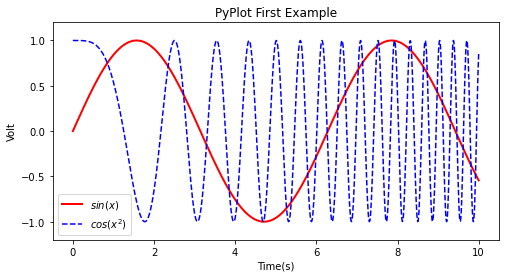

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8,4))

plt.plot(x,y,label="$sin(x)$",color='red',linewidth=2)
plt.plot(x,z,"b--",label="$cos(x^2)$")
          
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("PyPlot First Example")
plt.ylim(-1.2,1.2)
plt.legend()
          
# plt.show()
plt.savefig("test.png",dpi=120)

savefig()的第一个参数可以是文件名,也可以是和 Python的文件对象有相同调用接口的对象。例如可以将图像保存到io.BytesIO对象中，这样就得到了一个表示图像内容的字符串。这里需要使用fmt参数指定保存的图像格式。

In [4]:
import io
buf = io.BytesIO() # 创逑一个用来保存图像内容的BytesIO对象
plt.savefig(buf, fmt="png") # 将图像以 png 格式保存到 buf 中
buf.getvalue()[: 20] # 显示图像内容的前20个字节

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0'

<Figure size 432x288 with 0 Axes>

## 面向对象的方式绘图

matplotlib实际上是一套面向对象的绘图库, 它所绘制的图表屮的每个绘图元素， 例如线条、文字、刻度等在内存中都有一个对象与之对应。我们只需要调用 pyplot模块所提供的闲数就可以实现快速绘图以及设置图表的各种细节。
    
pyplot模块的内部保存了当前图表以及当前子图等信息。可以使用gcf()和gca()获得这两个对象:

**gcf()**:"Get Current Figure"的缩写，表示获取图表的Figure对象；
    
**gca()**："Get Current Axes"的缩写，表示获取子图的Axes对象。

查看plot()函数的源数据可以看出plot()函数实际上会通过gca()获得当前的Axes对象ax, 然后再调用它的 plot()方法来实现真正的绘图。

Figure(432x288) AxesSubplot(0.125,0.125;0.775x0.755)


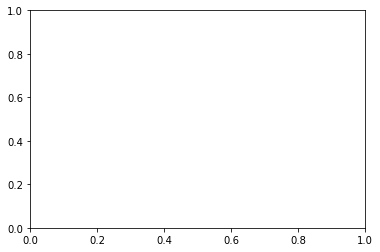

In [5]:
fig = plt.gcf()
axes = plt.gca()
print(fig,axes)

## 配置、获取对象属性

matplotlib所绘制图表的每个组成部分都和一个对象对应，通过特定函数可以获取、设置对象的相关属性。

**set_\*()**或者pyplot模块的**setp()**:可以设置对象的相关属性；

**get_\*()**或者pyplot模块的**getp()**：可以获取对象的相关属性。

### 设置属性

下面例子中line的类型为Line2D对象,通过设置Line的set_alpha实现对不透明度的设置。

<class 'matplotlib.lines.Line2D'>


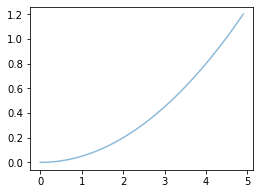

In [6]:
plt.figure(figsize=(4,3))
x = np.arange(0,5, 0.1)
line = plt.plot(x,0.05*x*x)[0] # plot 返回一个元素类型为Line2D的列表
line.set_alpha(0.5) # 调用 Line2D 对象的 set__*()方法来设置厲性值，此处设置line的不透明度为0.5。
print(type(line))

下面例子中lines为含两个Line2D元素的列表，调用setp()可以同时设置多个对象的多个属性。

[None, None, None, None]

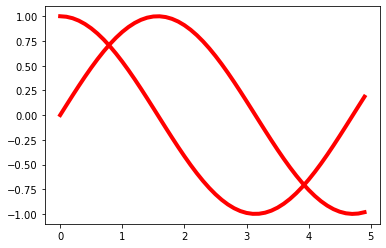

In [7]:
lines = plt.plot(x,np.sin(x),x,np.cos(x))
plt.setp(lines, color="r", linewidth=4)

### 获取属性
    
可以通过调用Line2D对象的 get_\*()或者通过 plt.getp()来获取对象的属性值。

getp()只能对一个对象进行操作，它有两种用法：
    
    指定属性名：返回指定属性的值。
    不指定属性名：返回对象所有属性的值。

In [8]:
print (line.get_linewidth())
print (plt.getp(lines[0], "color")) # 返回 color 属性

f = plt.gcf() # 获取当前Figure对象
print(plt.getp(f)) # 输出当前Figure对象所有属性的值

1.5
r
    agg_filter = None
    alpha = None
    animated = False
    axes = []
    children = [<matplotlib.patches.Rectangle object at 0x0000000...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (0.04167, 0.04167, 0.02, 0.02)
    contains = None
    default_bbox_extra_artists = []
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [6. 4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=6.0, ...
    zorder = 0
None


<Figure size 432x288 with 0 Axes>

Figure对象的 axes属性楚一个列表， 它保存图表中的所有子图对象。

[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012BB5B50>] True


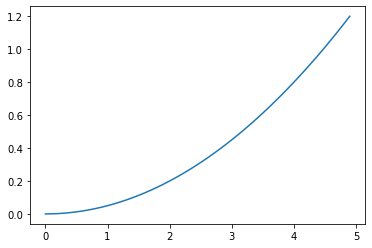

In [9]:
line = plt.plot(x,0.05*x*x)[0]

f = plt.gcf() # 获取当前Figure对象
print(plt.getp(f,'axes'),plt.getp(f,'axes')[0] is plt.gca()) # 输出当前Figure对象'axes'属性的值,并将其与当前子图属性比较

用 plt.getp()可以继续获取AxesSubplot对象的属性。

<a list of 1 Line2D objects> True


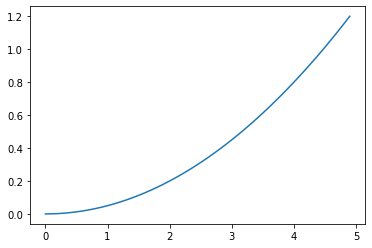

In [10]:
line = plt.plot(x,0.05*x*x)[0]

alllines = plt.getp(plt.gca(),"lines") # 获取当前子图的lines属性
print(alllines,alllines[0] is line) # 将lines属性列表的第一个Line2D对象与line比较

通过这种方法可以很容易查看对象的属性值以及各个对象之间的关系， 找到需要配置的属性。

[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012C58490>] 2


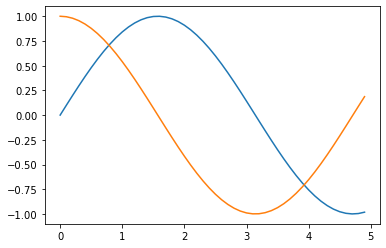

In [11]:
lines = plt.plot(x,np.sin(x),x,np.cos(x))

f = plt.gcf() # 获取当前Figure对象
print(f.axes,len(f.axes[0].lines)) # 获取当前Figure对象的子图属性，并打印当前子图中Line2D对象的个数。

## 绘制多子图

### subplot()创建子图

一个Figure对象可以包含多个子图(Axes),用Axes对象表示一个绘图区域，使用subplot()可以快速创建多个子图。

**subplot(numRows,numCols,plotNum)**:整个绘图区域被分为numRows行和numCols列，然后按从左往右，从上往下的顺序对每个区域进行编号，左上角编号为1。三个参数都小于10，则可以把它们缩写成一个整数， 例如subplot(323)和 subplot(3,2,3)的含义相同。如果新创建的子图和之前创建的子图区域有重叠的部分，之前的子图将被删除。

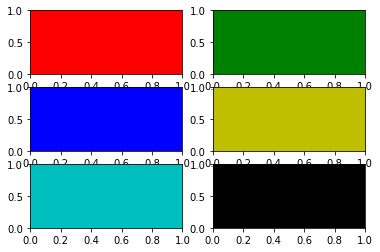

In [12]:
for idx,color in enumerate("rgbyck"):
    plt.subplot(321+idx,facecolor = color) # 通过facecolor（python2版本为asisbg属性）属性给子图添加背景色。

如果希望某个子图占据整行或整列, 可以如下调用 subplot():

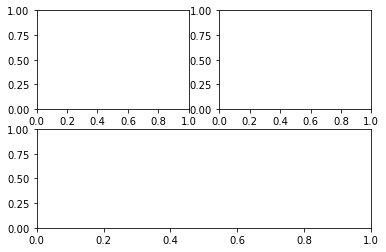

In [13]:
plt.subplot(221) # 分成2x2，占用第一个，即第一行第一列的子图
plt.subplot(222) # 分成2x2，占用第二个，即第一行第二列的子图
plt.subplot(212) # 分成2x1，占用第二个，即第二行

**sunplots_adjust()**：在绘图窗口的工具栏屮，有一个名为**“ Configure Subplots”**的按钮，单击它会弹出调节子图间距和子图与图表边框距离的对话框。也可以在程序屮调用sunplots_adjust()调节这些参数，它有left、right、bottom、 top、 wspace和 hspace共6个参数， 这些参数与对话框中的各个控件对应。参数的取值范围为0到1，它们是以图表绘图区域的宽和高进行正规化之后的坐标或长度。

subplot()返回所创建并选择的Axes对象，可以用变量将Axes对象保存起来，然后使用sca()交替调用Axes对象，使之成为当前子图对象，并调动plot进行绘图。

如需同时绘制多幅图表时，可以给figure()传递一个整数参数来指定Figure对象的序号，在后面调用Figure对象时，如果Figure对象已经存在则不会创建新的Figure对象，只会将其设为当前Figure对象。

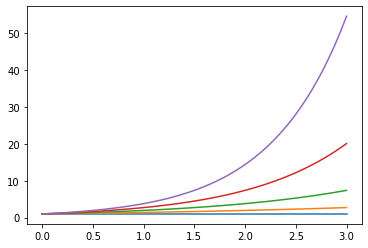

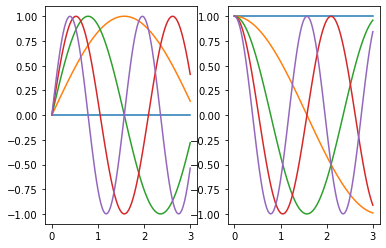

In [14]:
plt.figure(1) # 创建图表1
plt.figure(2) # 创建图表2
ax1 = plt.subplot(121) # 在图表2内创建子图1
ax2 = plt.subplot(122) # 在图表2内创建子图2

x = np.linspace(0,3,100)
for i in range(5):
    plt.figure(1) # 不会创建图表，将图表1设为当前图表
    plt.plot(x,np.exp(i*x/3))
    plt.sca(ax1) # 将图表2中的子图2设为当前子图
    plt.plot(x,np.sin(i*x))

    ax2.plot(x,np.cos(i*x)) # 在图表2中的子图2内绘曲线

### subplots()创建子图

**subplots():**可以一次生成多个子图，并返回图表对象和保存子图对象的数组。

(2, 3)
Figure(432x288)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)


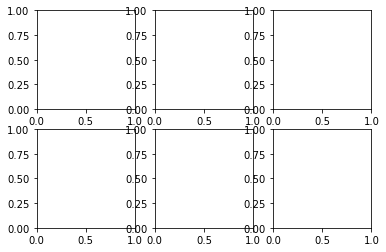

In [15]:
fig,axes = plt.subplots(2,3) #fig为子图所在图表对象，axes为所有子图对象组成的数组
[a,b,c],[d,e,f] = axes
print(axes.shape)
print(fig)
print(b)

###  subplot2grid()子图布局
可以调用 subplot2grid()进行史复杂的表格布局。表格布局和在Excel或 Word中绘制表格十分类似，其调用参数如下：

**subplot2grid(shape, loc, rowspan=l, colspan=l, \*\*kwargs)**:其中shape为网格形状元组（行数、列数），loc为子图左上角的坐标（行，列）。rowspan和colspan分别为子图所占据的行数列数，下面例子为3x3网格上创建5个子图。

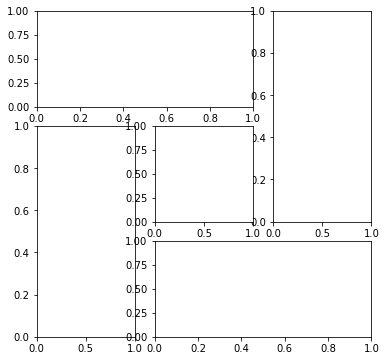

In [16]:
fig = plt.figure(figsize = (6,6))
ax1 = plt.subplot2grid((3,3),(0,0),colspan=2)
ax2 = plt.subplot2grid((3,3),(0,2),rowspan=2)
ax3 = plt.subplot2grid((3,3),(1,0),rowspan=2)
ax4 = plt.subplot2grid((3,3),(2,1),colspan=2)
ax5 = plt.subplot2grid((3,3),(1,1))

## 配置文件

在图像绘制时如果没有对matplotlib相关属性进行设置，就会直接采用matplotlib默认的配置。默认的配置文件保存在名为matplotlibrc的配置文件中，通过修改默认配置文件可以修改图标的默认样式。

可以同时配置使用多个matplotlibrc配置文件，它们的搜索顺序如下：
* 当前路径：程序的当前路径；
* 用户配置路径：通常在用户文件夹的.matplotlib目录下，可以通过修改环境变量MATPLOTLIBRC修改它的位置；
* 系统配置路径：保存在matplotlib的安装目录下的mpl-data中。

### 路径

通过以下语句可以获得用户配置路径：

In [17]:
from os import path
import matplotlib
path.abspath(matplotlib.get_configdir())

'C:\\Users\\wangkehai\\.matplotlib'

通过以下语句可以获得目前配置文件的路径：

In [18]:
path.abspath(matplotlib.matplotlib_fname())

'c:\\users\\wangkehai\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

输出配置文件可以使用rc_params(),它返回一个配置字典。

In [19]:
print(matplotlib.rc_params())

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

当matplotlib模块载入时会调用rc_params(),并把得到的配置字典保存到rcParams变量中：

In [20]:
print(matplotlib.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

### 修改配置文件

matplotlib绘图时将使用rcParams字典中的配置进行绘图，可以直接更改此字典中的配置来更改此后的绘图元素。

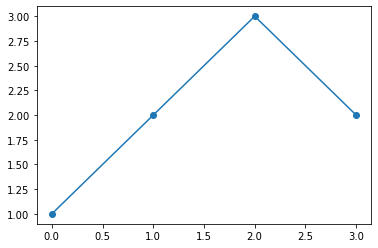

In [21]:
matplotlib.rcParams["lines.marker"] = "o"
plt.plot([1,2,3,2])

为了方便对配置字典进行设置，可以使用rc()。下面的例子同吋配置点标识符、线宽和颜色：

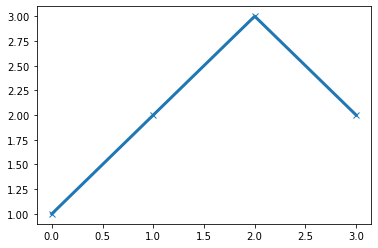

In [22]:
matplotlib.rc("lines",marker="x",linewidth=3, color = 'r')
plt.plot([1,2,3,2])

### 恢复默认配置

可以调用 rcdefaults()可以恢复到matplotlib载入时的默认配置。

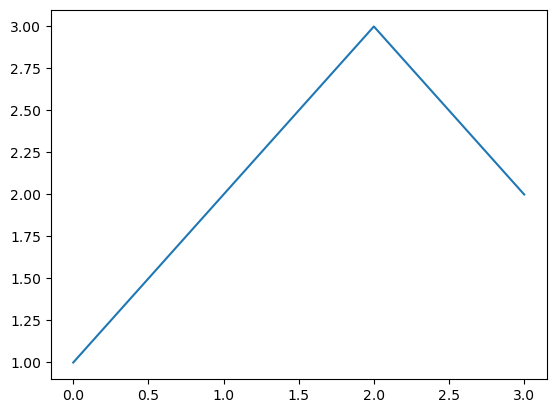

In [23]:
matplotlib.rcdefaults()
plt.plot([1,2,3,2])

### 样式切换
matplotlib.style模块提供绘图样式切换功能，所有可选样式可以通过available获得:

In [24]:
from matplotlib import style
print(style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


调用 use()函数即可切换样式.

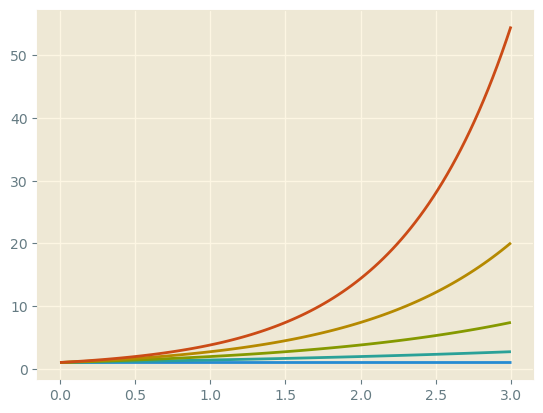

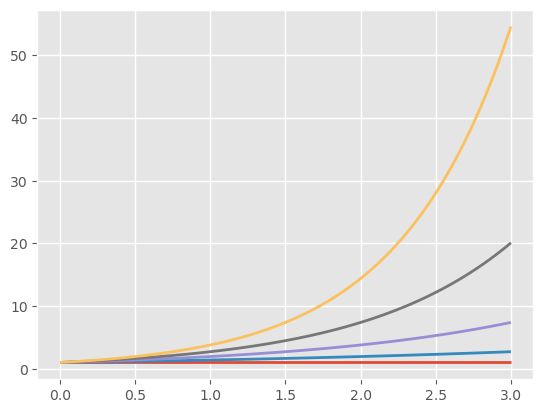

In [25]:
plt.figure(1)
plt.figure(2)

x = np.linspace(0,3,100)
for i in range(5):
    plt.figure(1)# 不会创建图表，将图表1设为当前图表
    style.use("Solarize_Light2")
    plt.plot(x,np.exp(i*x/3))
    plt.figure(2)
    style.use("ggplot")
    plt.plot(x,np.exp(i*x/3))

## 使用中文

可以通过下面几种方法设置中文字体：
* 在程序中直接指定字体。
* 在程序开头修改配置字典 rcParams。
* 修改配置文件。

在 matplotlib中可以通过字体名指定字体， 而每个字体名都与一个字体文件相对应。通过下面的程序可以获得所有可用字体的列表：

其中ttflist是一个matplotlib的系统字体列表。其每个元素都是表示字体的Font对象。字体的name属性为字体名，fname属性为字体所在全路径。

In [28]:
from matplotlib.font_manager import fontManager
print(fontManager.ttflist[:3])
print(fontManager.ttflist[0].name)
print(fontManager.ttflist[0].fname)

cmmi10
c:\users\wangkehai\appdata\local\programs\python\python38\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmmi10.ttf


os.stat(psth)：获得指定路径的文件的stat 结构，stat结构如下：
* st_mode: inode 保护模式
* st_ino: inode 节点号。
* st_dev: inode 驻留的设备。
* st_nlink: inode 的链接数。
* st_uid: 所有者的用户ID。
* st_gid: 所有者的组ID。
* st_size: 普通文件以字节为单位的大小；包含等待某些特殊文件的数据。
* st_atime: 上次访问的时间。
* st_mtime: 最后一次修改的时间。
* st_ctime: 由操作系统报告的"ctime"。在某些系统上（如Unix）是最新的元数据更改的时间，在其它系统上（如Windows）是创建时间（详细信息参见平台的文档）。

0.07916666666666666
True
Microsoft JhengHei
Meiryo
Malgun Gothic
Microsoft YaHei
FZShuTi
Microsoft JhengHei
KaiTi
Arial Unicode MS
STFangsong
Microsoft YaHei
STCaiyun
STXihei
Meiryo
STXingkai
STSong
MS Mincho
SimHei
MingLiU
YouYuan
SimSun
MingLiU-ExtB
Cambria
FangSong
Batang
Microsoft JhengHei
Malgun Gothic
FangSong_GB2312
Nirmala UI
LiSu
DFKai-SB
STKaiti
STLiti
Microsoft JhengHei
Gabriola
Gulim
MS Gothic
SimSun-ExtB
FZYaoTi
Microsoft YaHei
STHupo
STZhongsong
Nirmala UI
STXinwei
Microsoft YaHei
MS Mincho


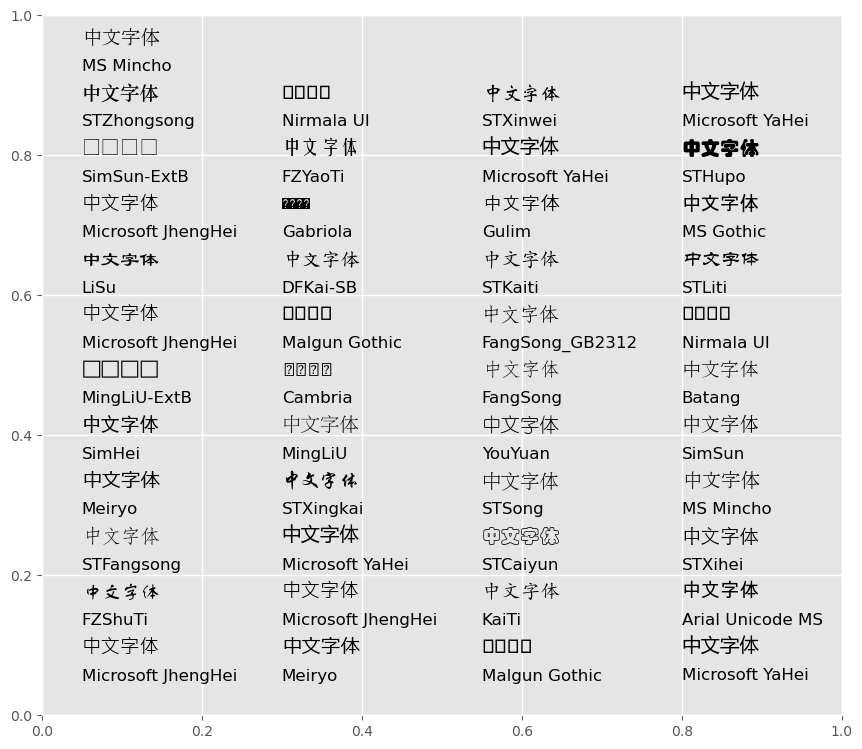

In [58]:
import os
from os import path

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1,1,1)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)#设置子图距左、下、右、上、水平间距，垂直间距。
# plt.xticks([])
# plt.yticks([])

# for font in fontManager.ttflist:
#     if os.stat(font.fname).st_size>1e6: 
#         if path.exists(font.fname):
#             print(font.name)

x, y = 0.05, 0.05
fonts = [font.name for font in fontManager.ttflist if path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts)#获得字体大小大于1MB的字体
dy = (1.0 - y) / (len(fonts) // 4 + (len(fonts)%4 != 0))
print(dy)
print(len(fonts)%4 != 0)
for font in fonts:
    print(font)
for font in fonts:
    t = ax.text(x, y + dy/2, u"中文字体",{'fontname':font, 'fontsize' :14} , transform=ax.transAxes)
    ax.text(x, y, font, { 'fontsize':12}, transform=ax.transAxes) # ax.transAxes:设置
    
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()

### 系统TTC字体使用

由于matplotlib只搜索TTF字体文件， 因此无法通过上述方法使用系统中安装的许多复合TTC字体文件。可以直接创建使用字体文件的FontProperties对象，并使用此对象指定图表中的各种文字的字体。

**font_manager.FontProperties(fname,size)**：创建FontProperties对象，fname参数为系统字体的绝对路径。

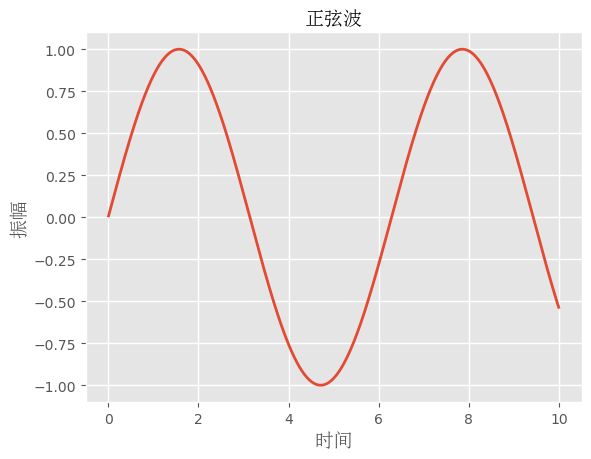

In [52]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.close("all")
plt.plot(t, y)
plt.xlabel(u"时间", fontproperties=font) #将FontProperties对象作为字体属性传递给显示函数
plt.ylabel(u"振幅",  fontproperties=font)
plt.title(u"正弦波", fontproperties=font)
plt.show()

可以直接修改配置字典， 设置默认字体， 这样就不需要在每次绘制文字时设置字体了。

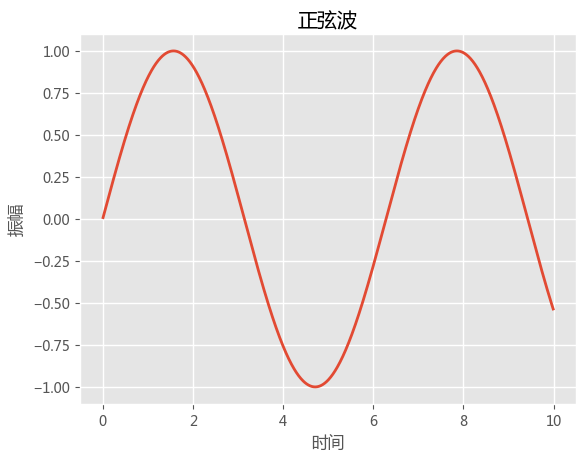

In [70]:
# 在我的 notebook 里，要设置下面两行才能显示中文
# plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.plot(t, y)
plt.xlabel(u"时间")
plt.ylabel(u"振幅")
plt.title(u"正弦波")
plt.show()